In [1]:
import importlib, math, rw_utils as rw

# Initial Development

## A single random walk

$\mathcal{RW} := \mathcal{RW}(n, x_0, \text{seed})$. <br>
Or with no seed, $\mathcal{RW} := \mathcal{RW}(n, x_0)$.

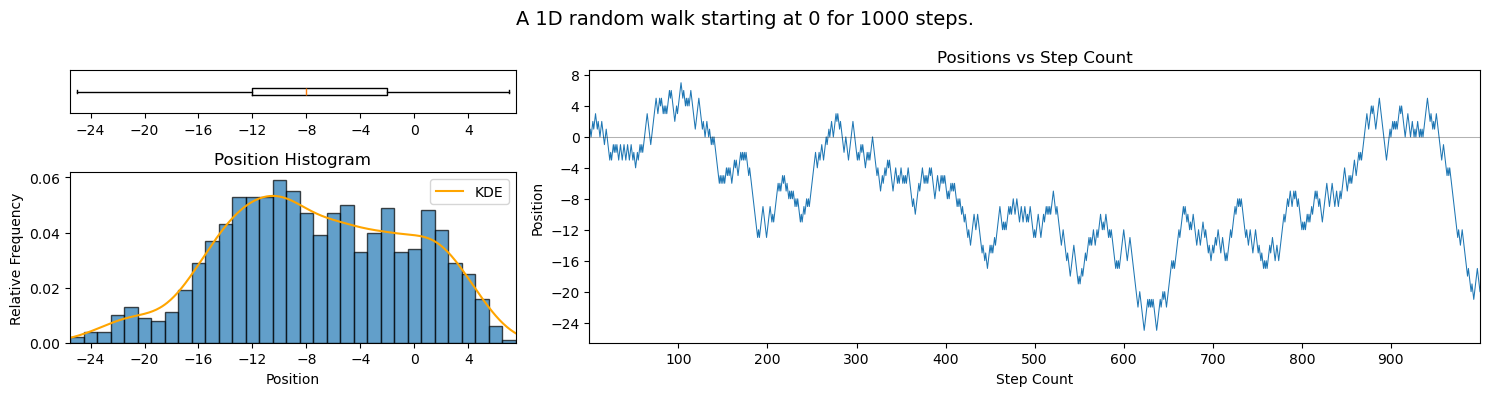

In [2]:
importlib.reload(rw)
#_______________________________________________________
#_______________________________________________________
n = int(1e3)    # @ 10^6, took < 9 min
x0 = 0
seed = 42

a_walk = rw.Walk(n, x0, recep="off") # recep="off" for no math description
# a_walk = rw.Walk(n, x0, seed=seed) 

a_walk.plot_walk()

## Trial of Measurements for a Random Walk

$\mathbb{E}\big[\mathcal{RW}(n, 0)\big] ?$ i.e. what is the expected net displacement of a random walk for $n$ steps and starting at $0$. <br>
Just like in physical experiments, determining the net displacement of a random walk for $n$ steps is the measurement. <br>
And collecting enough measurements, for the parameter $n$ steps, elicits an estimation of the net displacement for a random walk of $n$ steps, starting at 0: $\mathbb{E}[\mathcal{RW}(n, 0)] \sim \mu_{\mathcal{RW}(n, 0)}$. <br>
$\therefore \big\{\mathcal{RW}_{1}(n, 0), ..., \mathcal{RW}_{M}(n, 0)\big\} \implies \mathbb{E}\big[\mathcal{RW}(n, 0)\big] \implies \sigma_{\mathcal{RW}(n, 0)} \rightarrow \sqrt{n}$. <br>

It's here that with $n \rightarrow \infty$, the probability distribution for the net displacement has $\mu \rightarrow 0$ and see that it is arguably from a standard normal distribution $\mathcal{N}\big(0, \sqrt{n}\big)$. 

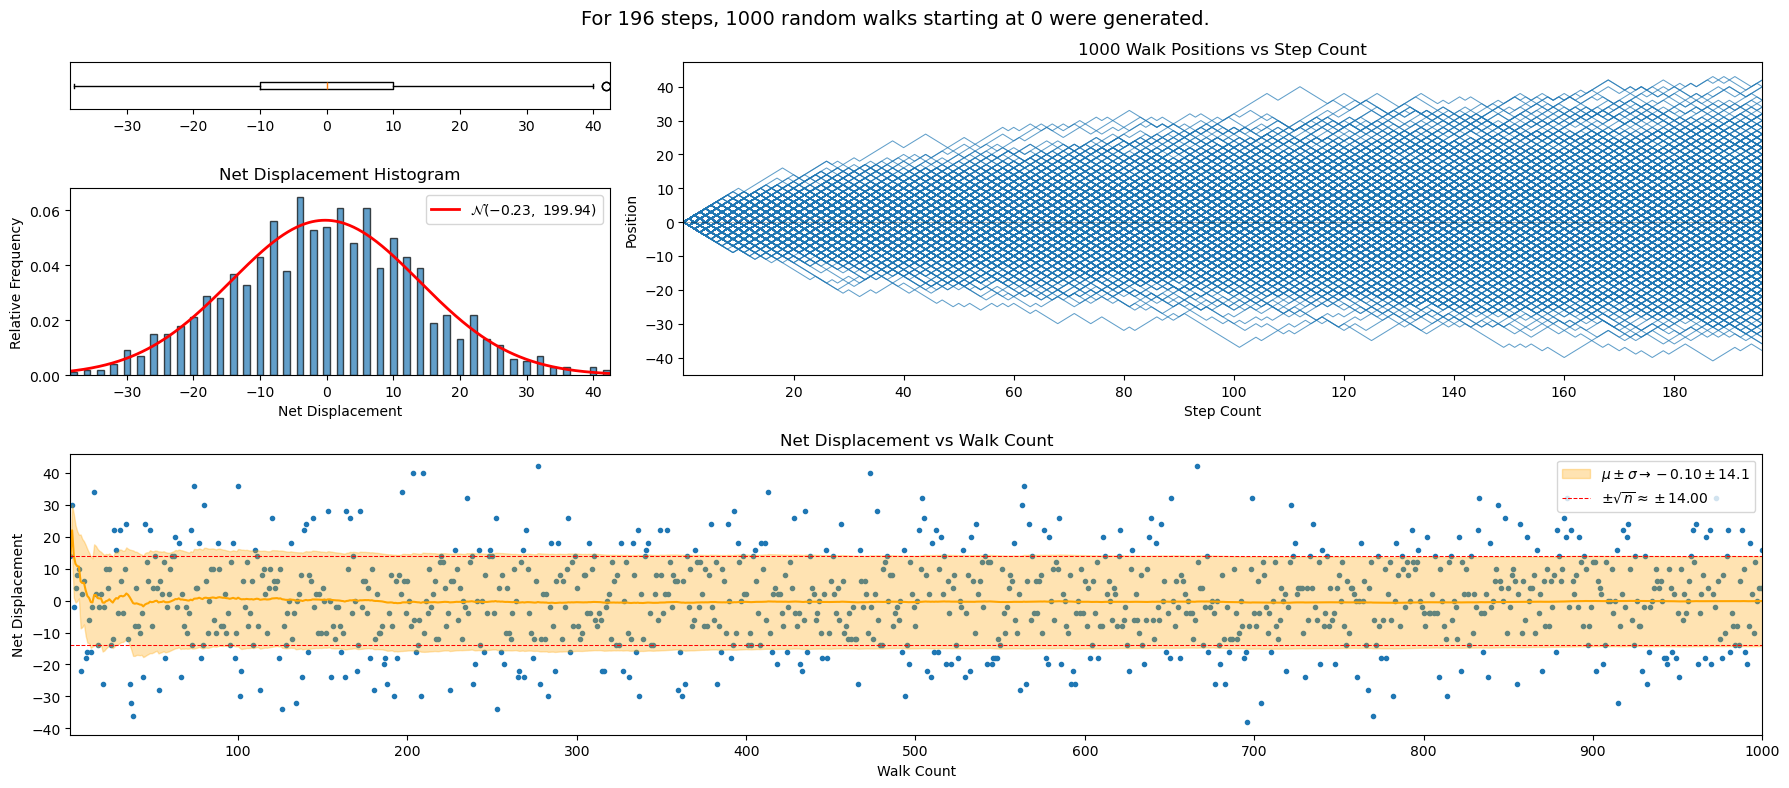

In [3]:
importlib.reload(rw)
#_______________________________________________________
#_______________________________________________________
M = int(1e3)  # walks for a trial
n = int(14)**2 # steps for trial
x0 = 0 # initial position

some_walks = rw.Walk_Trial(M, n, x0, recep="off")
some_walks.plot_trial()

## Standard Deviation of Trials as $n \rightarrow \infty$

* $t$: number of trials
* $M$: number of measurements for a trial
* $n$: number of steps for a trial

$(t;M,n) \implies \Bigg\{ \big\{\mathcal{RW}_{1}(n_1, X_0), ..., \mathcal{RW}_{M_1}(n_1, X_0) \big\}, ..., \big\{\mathcal{RW}_{1}(n_t, X_0), ..., \mathcal{RW}_{M_t}(n_t, X_0) \big\} \Bigg\} \implies \Big\{ \mathbb{E_1}(X_{f_{1}}), ...,  \mathbb{E_t}(X_{f_{t}}) \Big\} \implies \big\{ \hat\sigma_1, ..., \hat\sigma_t \big\}$

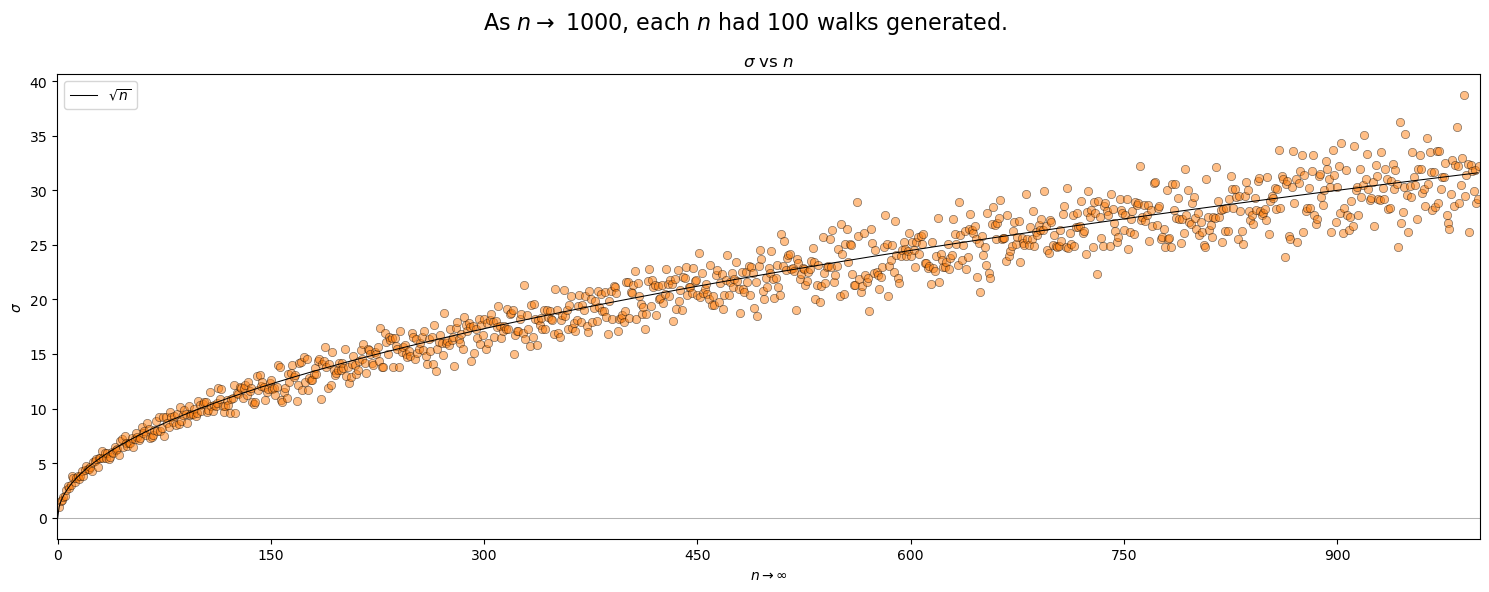

In [4]:
importlib.reload(rw)
#_______________________________________________________
#_______________________________________________________
t = int(1e3)  # number of trials
M = rw.np.array([100 for _ in range(t)])    # number of walks per trial
# n = rw.even_perfect_squares(t)     # number of steps per trial, e.g.) even perfect squares
n = rw.np.array([_ for _ in range(1, t+1)]) # integers, from 1 to t
x0 = 0  # initital position

some_Trials = rw.List_Trials(t, M, n, x0, "off")   # "off" for no data summary per trial
some_Trials.plot_stdevs()

# Final Development

## Entropy of positions for a Walk, Entropy of Net Displacements for a Trial

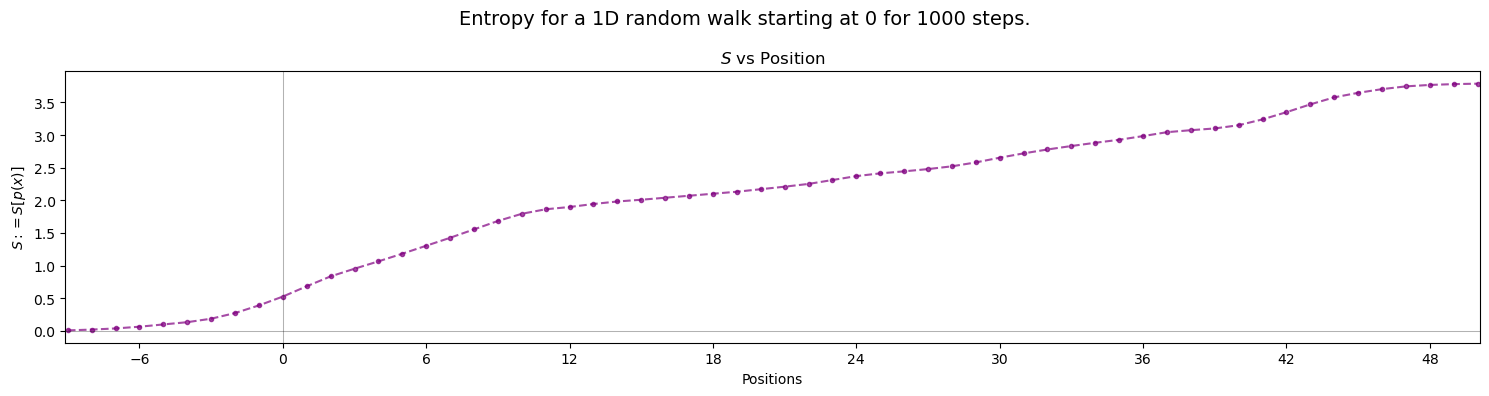

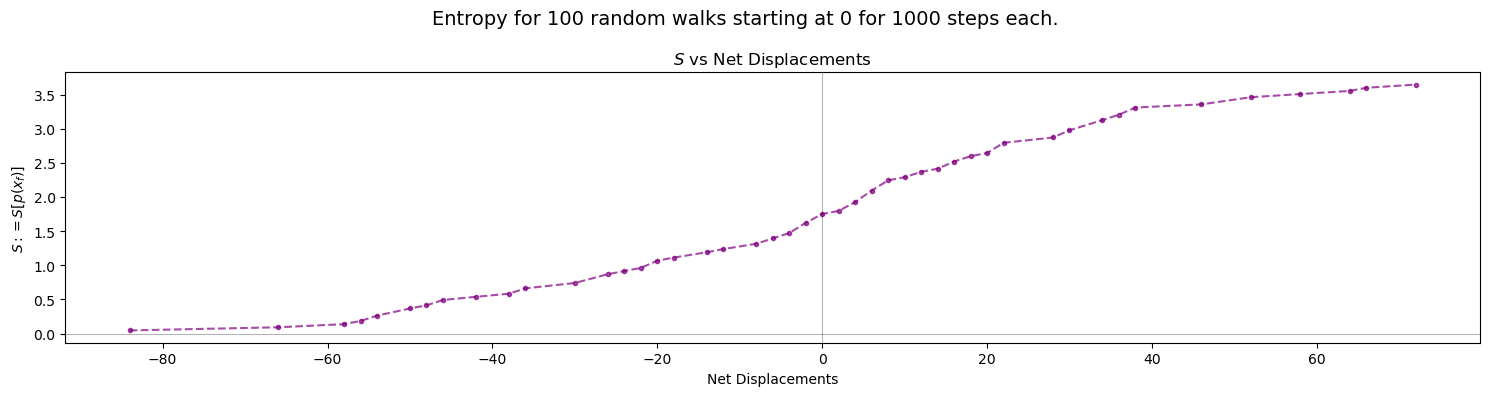

In [284]:
importlib.reload(rw)
#_______________________________________________________
#_______________________________________________________
n = int(1e3)    # @ 10^6, took < 9 min
x0 = 0
seed = 42

a_walk = rw.Walk(n, x0, recep="off")
# a_walk.plot_walk(desc="off")
a_walk.plot_entropy()
#_______________________________________________________
M = int(1e2)

a_trial = rw.Walk_Trial(M, n, x0, recep="off")
# a_trial.plot_trial("off")
a_trial.plot_entropy()

## Symmetric boundaries, $|x| = B \in \mathbb{R}$, meaning the walker steps back towards the origin after hitting boundaries.

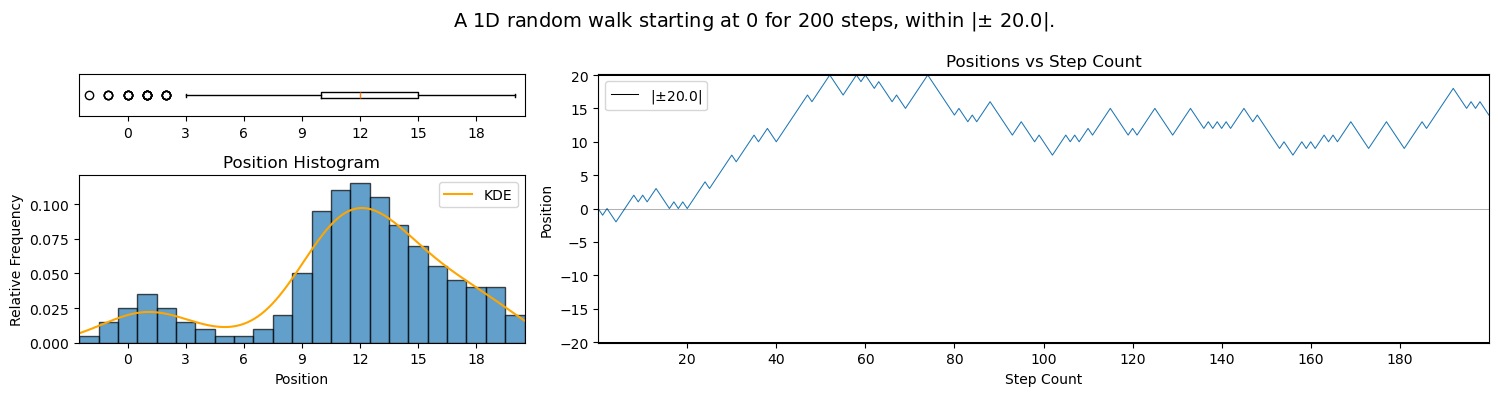

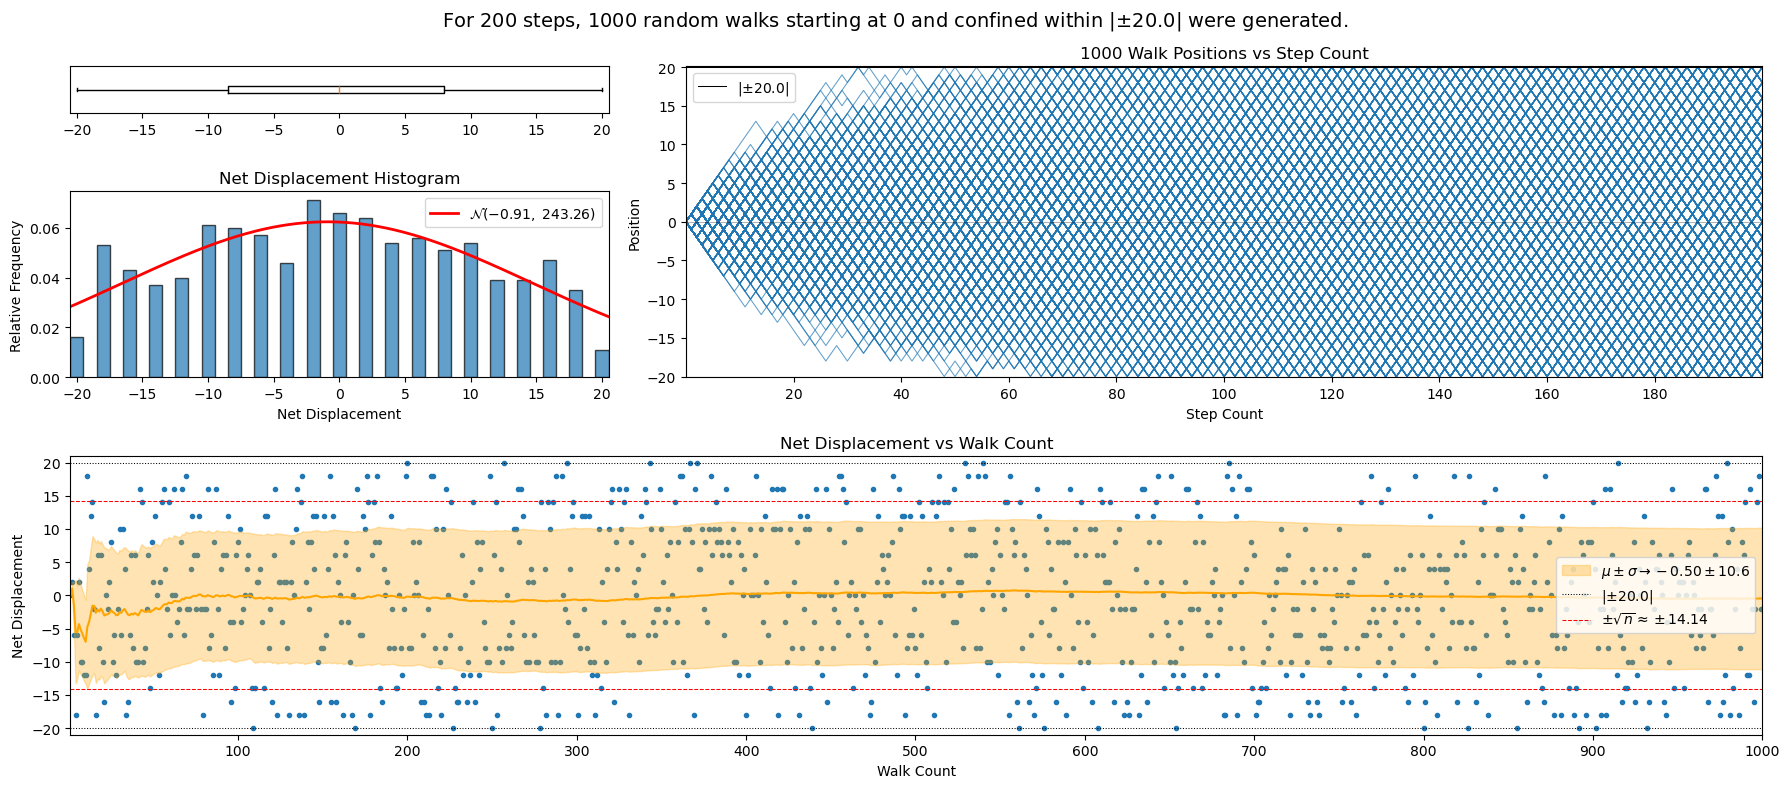

In [5]:
importlib.reload(rw)
#_______________________________________________________
#_______________________________________________________
n = int(2e2)    # note, net displacements can end up at the boundary when n & bound are both even
x0 = 0
seed = 42
# bound = math.sqrt(n)   # at minmum > 1. Things are intersting when bound = sqrt(n)
bound = n / 10

# bound_walk = rw.Walk(n, x0, bound=bound)
# bound_walk.plot_walk(desc="off", bound=bound)
# bound_walk.plot_entropy("off")
#_______________________________________________________
M = int(1e3)

bounded_walk = rw.Walk(n, x0, recep="off", bound=bound)
bounded_walk.plot_walk()

bounded_Trial = rw.Walk_Trial(M, n, x0, recep="off", bound=bound)
bounded_Trial.plot_trial()
# bounded_Trial.plot_entropy("off")

## Entropy as $n \rightarrow \infty$

For $t$ trials of measurements, there will be $M$ walks per trial where each walk will start at the origin & take $n$ steps depending on the trial.<br>
The net displacement was collected for each walk in a trial, where the probability distribution for the net displacements for a given trial had an associated entropy w.r.t. net displacement. <br>
The sum of said entropy over its entire domain, aka the max entropy, was derived and plotted w.r.t. the steps for the associated trial. <br>
This was done for each trial and the result is the plot of max entropy vs n becomes large.

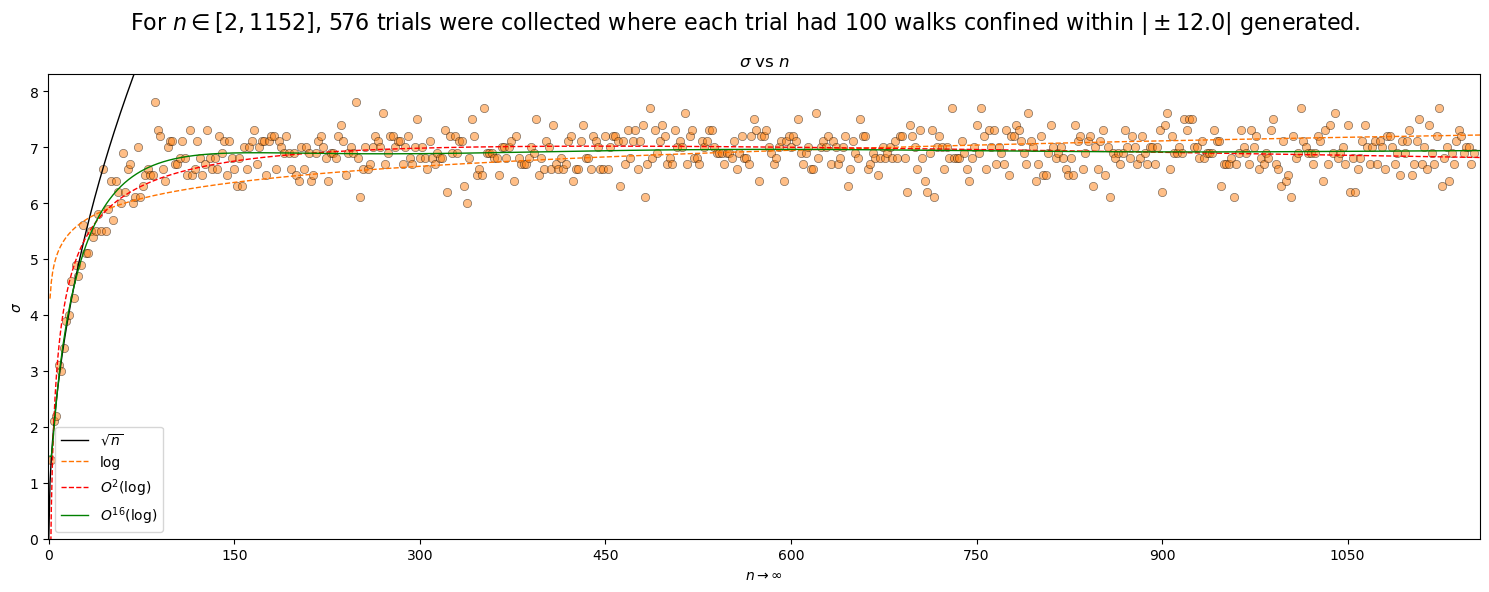

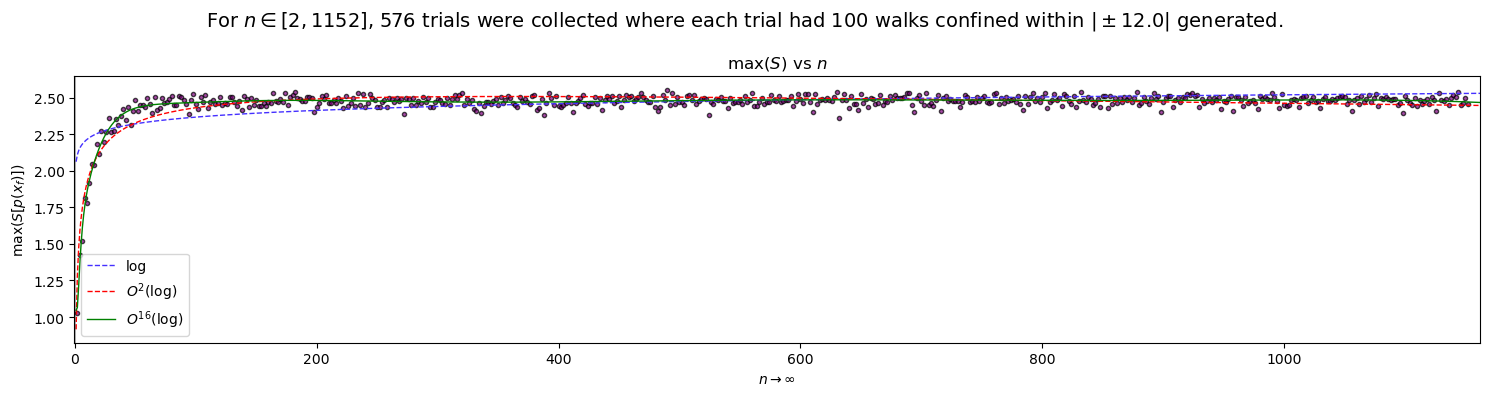

In [32]:
importlib.reload(rw)
#_______________________________________________________
#_______________________________________________________
t = int(24**2)  # number of trials
M = rw.np.array([100 for _ in range(t)])    # number of walks per trial

# n = rw.even_perfect_squares(t)     # number of steps per trial, e.g.) even perfect squares-
n = rw.even_nums(t)

x0 = 0  # initial position
bound = math.sqrt(t) / 2
#_______________________________________________________
bounded_Trials = rw.List_Trials(t, M, n, x0, recep="off", bound=bound)   # recep="off" for no data summary per trial
bounded_Trials.plot_stdevs()    # note due to boundaries, stdev no longer follows sqrt(n) behavior and instead becomes logarithmic 
bounded_Trials.plot_entropy()